## 01 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files 
uploaded = files.upload()

Saving x_test_without_nans.csv to x_test_without_nans.csv
Saving x_train_without_nans.csv to x_train_without_nans.csv
Saving y_test_without_nans.csv to y_test_without_nans.csv
Saving y_train_without_nans.csv to y_train_without_nans.csv


In [16]:
import io 
X_test = pd.read_csv(io.BytesIO(uploaded['x_test_without_nans.csv']))
X_train = pd.read_csv(io.BytesIO(uploaded['x_train_without_nans.csv']))
y_test = pd.read_csv(io.BytesIO(uploaded['y_test_without_nans.csv']))
y_train = pd.read_csv(io.BytesIO(uploaded['y_train_without_nans.csv']))


## 02 데이터 전처리

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
X_test.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'SubjectID', 'Age', 'diag_delta',
       'onset_delta', 'diag_minus_onset', 'mean_bp_d', 'max_bp_s',
       'max_resp_rate', 'max_pulse', 'bp_s_slope', 'fvc_slope', 'fvc_max'],
      dtype='object')

In [19]:
X_test = X_test.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "SubjectID" ])
X_train = X_train.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "SubjectID" ])
y_test = y_test.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "SubjectID" ])
y_train = y_train.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "SubjectID" ])

In [20]:
y_test['ALSFRS_slope']

0     -0.109807
1     -0.644876
2     -0.884848
3     -0.229560
4     -0.784002
         ...   
615   -0.118353
616   -0.668498
617   -0.784002
618   -1.357887
619   -0.891331
Name: ALSFRS_slope, Length: 620, dtype: float64

In [21]:
scaler = StandardScaler()
scaler.fit(X_test)
X_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_scaled, index=X_test.index, columns=X_test.columns)

scaler2 = StandardScaler()
scaler2.fit(X_train)
X_scaled = scaler2.transform(X_train)
X_train = pd.DataFrame(X_scaled, index=X_train.index, columns=X_train.columns)

y_test = y_test['ALSFRS_slope']

y_train = y_train['ALSFRS_slope']

## 03 모델 생성 및 학습하기 

### 03-1 XGBoost

In [22]:
from xgboost import XGBRegressor

In [23]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[15:19:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 03-2 Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 04 모델 학습 결과 평가하기 

### 04-1 MAE 와 RMSE

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [29]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

print('XGB MAE:', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE:', sqrt(mean_squared_error(y_test, pred_xgb)))

print('LR MAE:', mean_absolute_error(y_test, pred_lr))
print('LR RMSE:', sqrt(mean_squared_error(y_test, pred_lr)))

XGB MAE: 0.4194338363927687
XGB RMSE: 0.5405028036294262
LR MAE: 0.4246733592226545
LR RMSE: 0.5436508338714064


### 04-2 실제 값과 추측 값 시각화

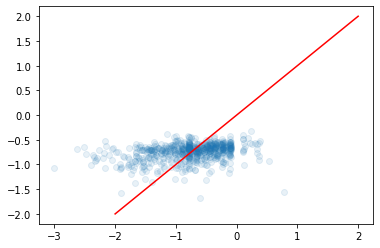

In [32]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_xgb, alpha=0.1)
plt.plot([-2, 2], [-2,2], 'r-')

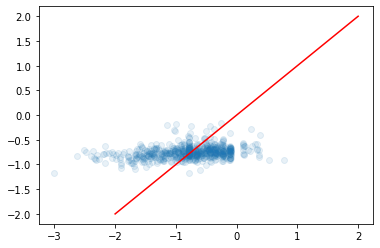

In [33]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_lr, alpha=0.1)
plt.plot([-2, 2], [-2, 2], 'r-')

### 04 -3 XGBoost 모델의 Feature Importance 시각화

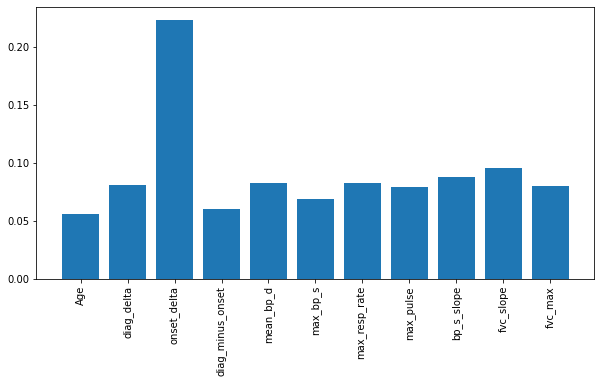

In [35]:
fig = plt.figure(figsize=(10,5))
plt.bar(X_train.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()